In [41]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import time

In [42]:
def sum_left_diagonal(board, i, j):
    total = 0
    while (i  < len(board)) and (j >= 0):
        total += board[i][j]
        i += 1
        j -= 1
    return total

def sum_right_diagonal(board, i, j):
    total = 0
    while (i  < len(board)) and (j < len(board)):
        total += board[i][j]
        i += 1
        j += 1
    return total

def conflict(board):
    colum_sum = np.sum(board, axis = 0)
    line_sum =  np.sum(board, axis = 1)
    total = 0
    for colum, line in zip(colum_sum, line_sum):
        if colum != 1:
            total += colum
        if line != 1:
            total += line
        
    for i in range(len(board)):
        left = sum_left_diagonal(board, i, len(board)-1)
        right = sum_right_diagonal(board, i, 0)
        
        if left != 1: total += left
        if right != 1: total += right
    
    for i in range(1, len(board)-1):
        left = sum_left_diagonal(board, 0, i)
        right = sum_right_diagonal(board, 0, i)
        
        if left != 1: total += left
        if right != 1: total += right
    
    return total

In [43]:
def create_board(list):
    size = len(list)
    board = np.zeros((size,size))
    for i in range(size):
        board[int(list[i])-1][i] = 1
    
    return board

def f(gene):
    board = create_board(gene)
    return conflict(board)

def GA(n, max_iter, population):
    varbound = np.array([[0,n]]*n)
    algorithm_param = {'max_num_iteration': max_iter,
                   'population_size':population,
                   'mutation_probability':0.4,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.8,
                   'crossover_type':'two_point',
                   'max_iteration_without_improv':None}
    model=ga(function=f,dimension=n,variable_type='int',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
    model.run()
    return create_board(model.output_dict['variable']), model.output_dict['variable']

 The best solution found:                                                                           
 [4. 6. 0. 3. 1. 7. 5. 2.]

 Objective function:
 0.0


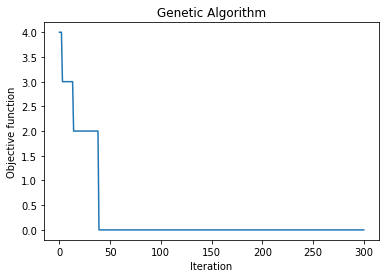

[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
Tempo de execução:  12.700767755508423


In [47]:
inicio = time.time()
result = GA(8, 300, 300)
fim = time.time()
print(result[0])
print("Tempo de execução: ", fim - inicio)

 The best solution found:                                                                           
 [3. 0. 6. 2. 9. 7. 4. 8. 1. 5.]

 Objective function:
 0.0


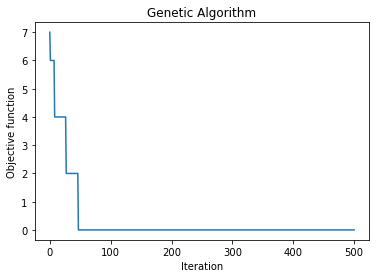

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Tempo de execução:  72.0522232055664


In [49]:
inicio = time.time()
result = GA(10, 500, 1000)
fim = time.time()
print(result[0])
print("Tempo de execução: ", fim - inicio)

 The best solution found:                                                                           
 [ 9.  5.  3. 11.  4. 10. 12.  6.  2.  7.  1.  8.]

 Objective function:
 0.0


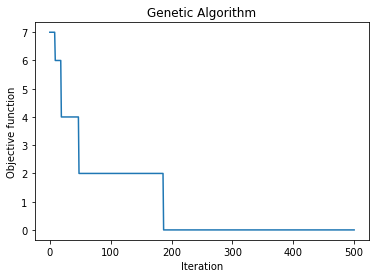

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Tempo de execução:  145.34394073486328


In [51]:
inicio = time.time()
result = GA(12, 500, 1500)
fim = time.time()
print(result[0])
print("Tempo de execução: ", fim - inicio)

In [59]:
lista = [ 9,  5,  3, 11,  4, 10, 12,  6,  2,  7,  1,  8]
print("Gene :", lista)
print("\nTabuleiro: ")
print(create_board(lista))

Gene : [9, 5, 3, 11, 4, 10, 12, 6, 2, 7, 1, 8]

Tabuleiro: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
